#### Introduction to model evaluation
In the previous units, we learned more about the process of fitting a model. We saw that functions such as the polyfit() one or objects like SGDRegressor or HuberRegression use an optimization algorithm to find the model parameters that minimize a cost function.

We will now learn about baseline strategies and see how to implement them using Numpy and Scikit-learn. We will also see how to use error metrics to evaluate and compare the baseline and models. At the end of this unit, you should know how to compare your models to a meaningful baseline.

This time, we will work on a modified version of the bike sharing dataset from the UCI repository. We split the data set of 302 samples into a training set and a test set containing 151 samples each.

The training and test sets are two important terms that you will see them frequently until the end of the program:

* The training set is to fit the models.
* The test set is to generate predictions from the trained model.

In [1]:
import pandas as pd

# Load the data into a Pandas DataFrame
train_df = pd.read_csv("c3_train_df.csv")
train_df.head()

,temp,users
0,0.5400,884
1,0.7942,662
2,0.4875,830
3,0.4350,1192
4,0.4358,259


The objective is to train models (on the 151 training samples) that use the temperature, temp, to predict the number of users, users. Then we should use error metrics to select the model that gives the best prediction on the 151 test samples.

But before any modeling exercise we should stop and ask ourselves, do we ever need to build a model to predict something? Ideally we could use our common sense, or experience or any reliable source of knowledge and give a meaningful prediction without building any model. For instance, one could argue that the average (or median) number of users in the training data can approximate the number of users in the test data. This sounds very naive but it is worth to try it and see the error.

The average and median are two baseline strategies. They don’t need any modeling, and they don’t depend on the patterns that appear in the data other than users.

* We often use baseline strategies on our day-to-day life to give our best guess or prediction for different things. For instance, our simple guess for the weather temperature of tomorrow could be simply today’s temperature, because temperature doesn’t usually change drastically from one day to the next. Or we can safely predict that a random person living in Basel speaks Swiss German, because most people there speak this language. Finally, we will not be wrong if we say that the weight of a random person is close the average or median weight of the population. Note that in none of these cases we build a model. These are all baseline predictions.

#### Compute the baseline
In our example, we compute the mean baseline. We should compute the average number of users on the training set and compare it with the number of users on the test set.



In [2]:
import numpy as np

# Extract the target
y_train = train_df.users.values

# Compute baseline
pred_baseline = np.mean(y_train)  
pred_baseline

695.2582781456954

In [3]:
#Let’s see how good our baseline is. Let’s load the test data.

# Load test data
test_df = pd.read_csv("c3_three-models.csv")
test_df.head()

,temp,users,pred_lr,pred_poly3,pred_huber3
0,0.1508,41,146,44,51
1,0.1609,54,161,53,52
2,0.1727,25,178,66,55
3,0.1775,75,185,72,57
4,0.1822,74,192,78,60


To check how accurate the value 695 is, we should compare it with the values in the users column. Note that we can use any cost function to calculate the error. For instance, we can use the mean absolute error (MAE).

In [4]:
# Mean absolute error
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))
# Extract the target
y_test = test_df.users.values

# compare the baseline with the target from the test data
mae_baseline = MAE(y_test, pred_baseline)
mae_baseline 

316.3029253102934

The advantage of MAE is that it has a clear interpretation. For instance, in our example, predictions from the baseline is wrong by, in average, 316 users. That’s a lot!

**Definition of a baseline** 

The average or median can serve as a baseline, and here are things you should know about a baseline:

* Baseline is a strategy that doesn’t rely on any modeling.
* Baseline can be calculated by just using the target.
* The mean and median are two ways to calculate a baseline, but there are also other strategies available and you will learn about them by the end of the program.
* In some domains (e.g. time series analysis), a simple baseline can give difficult-to-beat predictions.

Note that pred_baseline is a single value (i.e. 695) and not an array like y_test. However, we can use the MAE() function from above because it computes the residuals with (y-y_pred) which produces an array even if y_pred is a single value due to broadcasting.

If you want to produce a vector of predictions, you can create an array with the same shape as y_test and fill it with the mean value using the Numpy full_like() function.



In [7]:
# Vector with predictions from the baseline
pred_baseline = np.full_like(y_test, fill_value=np.mean(y_train), dtype=float)

In [8]:
print(len(pred_baseline), len(y_test))

151 151


Both are arrays with the same length.

How about Scikit-learn? how to use it to work out the baselines? Scikit-learn implements baselines in a DummyRegressor object which has a strategy parameter. We can set it to 'mean' or 'median'.

In [9]:
from sklearn.dummy import DummyRegressor

# Create the DummyRegressor object
dummy = DummyRegressor(strategy="mean")

 the DummyRegressor object implements the Scikit-learn estimator interface which means that it provides the fit() and predict() functions.

In [10]:
# Extract the features
x_train = train_df.temp.values

# Fit the estimator
dummy.fit(x_train[:, np.newaxis], y_train)

DummyRegressor()

The fit() function simply calculates the mean value of y_train, and we can then compute predictions with the predict() function.

In [11]:
# Extract the features
x_test = test_df.temp.values

# Vector with predictions from the baseline
pred_baseline = dummy.predict(x_test[:, np.newaxis])

# compare the baseline with the target from the test data
mae_baseline = MAE(y_test, pred_baseline)
mae_baseline  


316.3029253102934

We got the same result as in the case of Numpy calculation. Note that x_train[:, np.newaxis] and x_test[:, np.newaxis] didn’t influence the fit and predict methods.

Now that we know about baselines and how they are calculated, let’s compare predictions from models with the baseline and see if they lead to smaller errors than 316 users given by the baseline.

#### Compare models
we split the original data set of 302 samples into a training set and a test set containing 151 samples each. We fit three models on the training set and use the fitted models to predict users on the test set. We don’t show these steps but only put models’ predictions in the last three columns of the test data:

In [12]:
test_df.head()

,temp,users,pred_lr,pred_poly3,pred_huber3
0,0.1508,41,146,44,51
1,0.1609,54,161,53,52
2,0.1727,25,178,66,55
3,0.1775,75,185,72,57
4,0.1822,74,192,78,60


More precisely:

* The first model is a simple linear regression. We use the polyfit() function with degree equal to 1. Then we use the fitted model to predict the target for the second half of the data, i.e. test data. The predictions are named as pred_lr in the third column.
* In the second model, we change the degree to 3, and follow the same steps. The predictions are named as pred_poly3 in the fourth column.
* In the third model, we still fit a polynomial of degree 3, but with the HuberRegressor and the PolynomialFeatures objects from Scikit-learn. Yes, this sounds new and you will learn about it later in this course. The predictions are named as pred_huber3 in the last column.
Let’s visualize the three models by plotting their predictions.

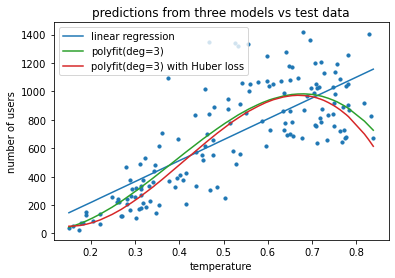

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

# Extract variables
x_test = test_df.temp.values

# Plot the models
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, test_df.pred_lr, c="C0", label="linear regression")
plt.plot(x_test, test_df.pred_poly3, c="C2", label="polyfit(deg=3)")
plt.plot(x_test, test_df.pred_huber3, c="C3", label="polyfit(deg=3) with Huber loss")

plt.title('predictions from three models vs test data')
plt.xlabel('temperature')
plt.ylabel('number of users')
plt.legend(loc='upper left')
plt.show()

It’s difficult to compare the three models visually. **One solution is to use a cost function such as the RSS one. In practice, we prefer to use the root mean squared error (RMSE) since it’s independent of the number of data points (i.e., it’s an average) and has roughly the same unit as the target variable.**

Let’s compute the RMSE scores using Numpy code from the previous exercises.

In [14]:
# Root mean squared error
def RMSE(y, y_pred):
    mse = np.mean(np.square(y - y_pred))  # MSE
    return np.sqrt(mse)  # RMSE


rmse_baseline = RMSE(y_test, pred_baseline)
rmse_lr     = RMSE(y_test, test_df.pred_lr)
rmse_poly3  = RMSE(y_test, test_df.pred_poly3)
rmse_huber3 = RMSE(y_test, test_df.pred_huber3)

# Print values
print("baseline:", rmse_baseline)
print("linear regression:", rmse_lr)
print("polyfit(deg=3):", rmse_poly3)
print("polyfit(deg=3) with huber loss:", rmse_huber3)

baseline: 371.6823731957837
linear regression: 232.53050786099598
polyfit(deg=3): 210.55145192395318
polyfit(deg=3) with huber loss: 215.66518077491205


According to this measure, the poly3 and the huber3 models have a better performance than the simple linear regression one, and the poly3 one performs slightly better than huber3.

Let’s change the cost function to the mean absolute error (MAE):



In [15]:
mae_baseline = MAE(y_test, pred_baseline)
mae_lr     = MAE(y_test, test_df.pred_lr)
mae_poly3  = MAE(y_test, test_df.pred_poly3)
mae_huber3 = MAE(y_test, test_df.pred_huber3)

# Print values
print("baseline:", mae_baseline)
print("linear regression:", mae_lr)
print("polyfit(deg=3):", mae_poly3)
print("polyfit(deg=3) with huber loss:", mae_huber3)


baseline: 316.3029253102934
linear regression: 186.58278145695365
polyfit(deg=3): 161.71523178807948
polyfit(deg=3) with huber loss: 164.75496688741723


The predictions from the poly3 model are wrong by, in average, 162 users. This is the lowest error among the three models, and all models perform better than the baseline. Note that MAE and RMSE are different cost functions. Hence, they might not agree on what is the best model.

Let’s create a final comparison of the different models using a bar chart.

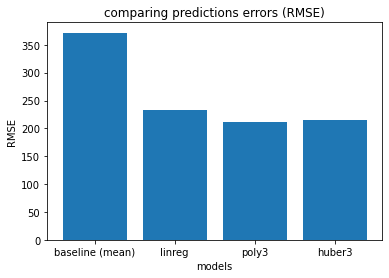

In [16]:
# Bar chart
plt.bar([1, 2, 3, 4], [rmse_baseline, rmse_lr, rmse_poly3, rmse_huber3])
plt.xticks([1, 2, 3, 4], ["baseline (mean)", "linreg", "poly3", "huber3"])
plt.title('comparing predictions errors (RMSE)')
plt.xlabel('models')
plt.ylabel('RMSE')
plt.show()

This chart gives us a good overview of our different models.

In practice, data sets usually have several features, and it’s difficult to visually “see” how well our models actually fit the data. For this reason, setting a baseline and comparing many different models can help in two ways:

To verify that our code works, i.e., a model that performs worse than the baseline is a sign that something might be wrong.
To choose an appropriate model, i.e., the model with the best accuracy isn’t necessarily the most appropriate one. We might consider other aspects such as speed and interpretability of the model.
Before finishing this unit, let’s do a small experiment to see when it makes sense to use mean and median as baselines.

#### A note on the choice of median versus mean

Which statistic should we use? In fact, both are good summaries of a set of values. They simply minimize different measures. The mean value optimizes the squares of the distances to the other values, whereas the median minimizes the absolute distances.

Let’s do a little experiment to verify that. We define a set of values and search for its optimal summary. For instance, let’s find the best summary of the set [1, 2, 3, 5, 6, 25] according to the MSE function. We can take one hundred values between 0 and 25 and treat them as candidate summaries. Here is the plot of the MSE cost function for these candidates.

The mean is 7 and the median is 4. the optimal summary is not unique. All median values (x between 3 and 5) are optimal summaries according to the MAE cost function. The MAE does not change in this range because moving to the summary candidate closer to 3 reduces the absolute errors for 1, 2, 3 while increasing the absolute errors for 5, 6, 25 by the same amount.

To summarize, it makes sense to use the mean as a baseline when we measure the squares of the residuals, e.g., RSS, MSE and RMSE cost functions. On the other hand, we should use the median as the baseline when we measure absolute distances like with the MAE cost function.

### The train-validate-test paradigm
In the previous units we have seen how to build linear models and how to fit polynomials. We have further seen that outliers can affect the quality of our model and how we can address this by removing data points before training our model or by using a cost function that can handle outliers better (the Huber loss).

Our goal is to find the best model possible. But how could we measure whether one model is better or worse than another. Since the plain linear regression algorithm optimizes for the RSS (Residual Sum of Squares), we could calculate this score for each model and then compare them.

We observed that using high degree polynomials leads to smaller errors, which leads to an improved RSS score. However, a simple visual inspection showed us that for high degree polynomials any noise in the data could strongly affect the outcome. We termed this “overfitting”. As a result, despite their improved score these models did not seem to represent the general pattern of the data very well.

This last point highlights a very important objective of machine learning:

**We want our models to generalize beyond their training data. Hence we want to empirically test our model on unseen data, i.e. data that was not used for training.**

In this context, we often speak of in-sample evaluations when using training data vs out-of-sample evaluations when using unseen test data. The performance of the model on the test data set is known as the generalization error and gives us an idea of how well our model performs in general. Hence good out-of-sample scores are more valuable than improved in-sample scores.

#### The test set
In practice, we either collect a separate data set for the out-of-sample evaluation, or we split our original data set into two parts, one for training our models and one for testing the final models.



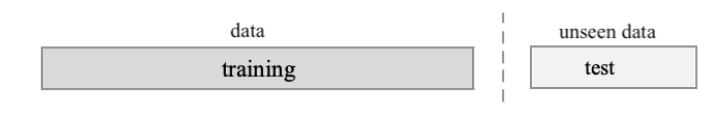

In [17]:
from IPython.display import Image
Image(filename="train.png")

Since the purpose of the test set is to provide an independent evaluation of the performance of our model, we must make sure that we don’t look into the test set or analyze it in any way. Otherwise we risk gaining some form of insight from the test data, which could influence how we design and train our model. Such insight is known as information leakage. In order to avoid this, after splitting off the test set we are not allowed to access test data until all our models are trained.

A simple way of thinking of the entire process is as follows. At the start of the project we collect or split off a test set, also known as the hold-out set, and hand it to our colleague Alice for safe keeping. Once we have finished training all our models, we pass the models to Alice, together with a program that prepares her test data set for the models. Alice runs the program and the models and assesses their performance.

The program that prepares Alice’s test data for the model should take care of all the preprocessing steps and the feature engineering that we applied to our training data. Most importantly, neither Alice nor the program will have access to information from within the test set itself. Thus any data-led transformations, e.g. using the median for a fillna() or using the mean and standard deviation to calculate z-scores, can only use the statistical values calculated on the training data. We will see many details of this later on in this course. In short:

**Any data transformations performed on the training or test data can only use information obtained from the training data. We must ensure that no information from the test data can influence these transformations.**

. A simple step could be to evaluate and compare all models on the test data and choose the polynomial degree of the model with the best out-of-sample performance. However, this approach would use information from the test data to determine the optimal degree for our model. This is a no-go as we would lose our ability to measure the generalization error reliably.

Instead, at the start of our model building we put aside part of our training set to help us decide on the best degree. This set is excluded from training and is known as the validation set. It acts as an internal hold-out set to evaluate how well different models are doing before selecting the best one.

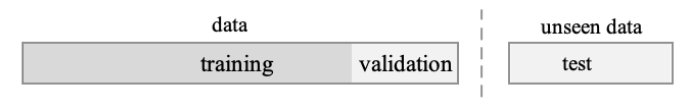

In [18]:
Image(filename="train2.png")

The model performance on the validation set also provides an estimate of the generalization error. And since we have not used the test set up to this point, the model performance on the test set can still provide an independent estimation of how well our model will generalize.

**Hyperparameters** are model parameters that are set manually as they cannot be calculated from data. They are fixed ahead of training and influence how the model is constructed or how it is trained. (Ex: degree of the polynome)

The optimal values of the hyperparameters depend on the problem and the data set. We can find suitable values by training multiple models with different hyperparameter combinations and then evaluating them on the validation set. This process is known as hyperparameter tuning.

More generally, the purpose of the validation set is to help us make decisions, without breaking the sanctity of the test set. Later on, we will see how to use validation sets to determine the best hyperparameters or select the best features. We will introduce different approaches to setup validation sets and create a robust decision making process for tuning our models.